In [1]:
import os, math, sys, scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

path     = os.getcwd()
datapath = path+'/datasets'
optpath  = path+'/optimization_data'

In [4]:
maindf = pd.read_csv(datapath+"/zech336_circ-seq-thread_dataset", index_col=0)

maindf['ff']=maindf.forcefield+'_'+maindf.ff_type
maindf['jfactor']=np.exp( -1*maindf.eopt )



maindf.head(5)

,length,state,scdna,config,opt_electro,sequence,forcefield,ff_type,eo,eopt,...,eopt_slide,eopt_rise,rg,ellipticity,wr,tw,lk,eopt_bend,ff,jfactor
0,336,st26,-6,circ,y,n000,ideal,dim,425.341570,71.975832,...,0.066879,0.047909,154.103178,6.418661,-3.137330,31.1373,28,49.382943,ideal_dim,5.511798e-32
1,336,st26,-6,circ,y,n084,young2022,dim,737.099023,85.164237,...,7.640217,2.362379,145.259872,4.757512,-2.577930,30.5779,28,72.616422,young2022_dim,1.031910e-37
2,336,st26,-6,circ,y,n000,young2022,dim,729.179813,84.419540,...,6.312908,2.425774,145.934537,4.821477,-2.665820,30.6658,28,69.411950,young2022_dim,2.172999e-37
3,336,st26,-6,circ,y,n084,young2022,tet,1029.239586,43.025826,...,7.743161,2.929474,139.279858,2.750362,-0.718755,30.7188,30,40.383670,young2022_tet,2.061205e-19
4,336,st26,-6,circ,y,n000,young2022,tet,1006.405047,42.941475,...,5.618226,2.595049,141.795696,3.101250,-0.742955,30.7430,30,38.548760,young2022_tet,2.242613e-19


In [5]:
maindf.sequence.unique()

array(['n000', 'n084', 'n047'], dtype=object)

### Global structural analysis

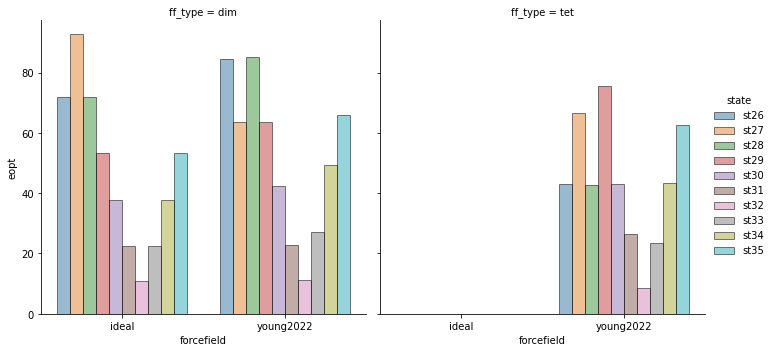

In [7]:
sns.catplot(data=maindf[(maindf.forcefield!="Olson1998")&(maindf.opt_electro=="y")&(maindf.sequence=="n000")], 
            x="forcefield", 
            y="eopt", 
            hue="state", 
            col="ff_type", edgecolor='black',alpha=0.50,
            kind='bar')



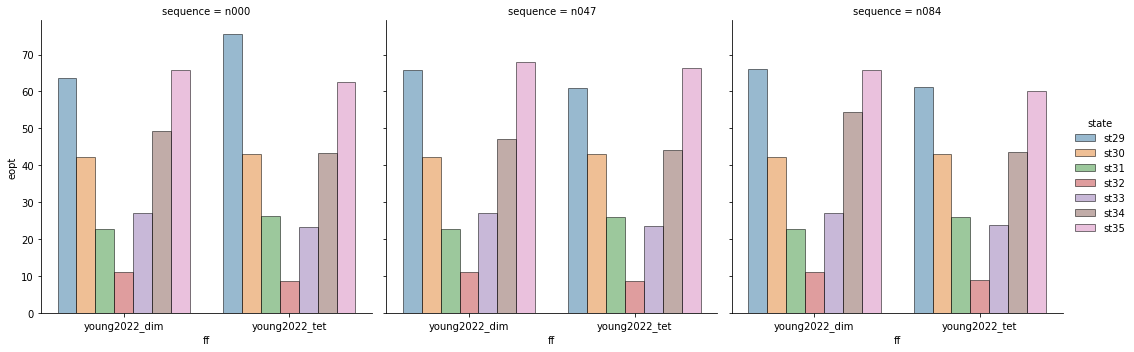

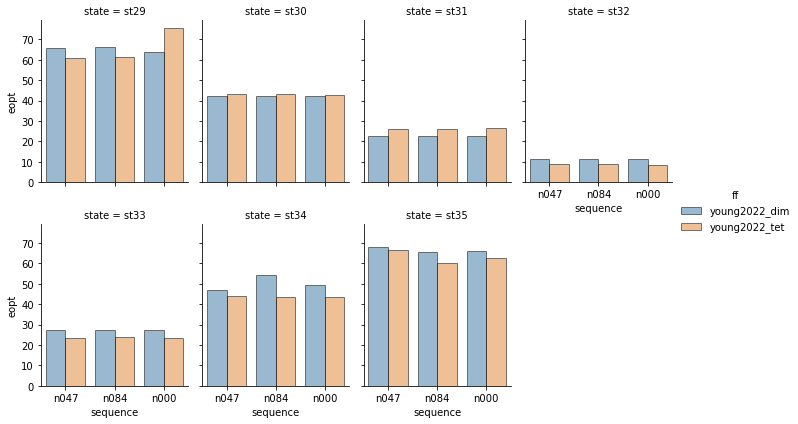

In [26]:
sns.catplot(data=maindf[(maindf.forcefield!="ideal")
                        &(maindf.opt_electro=="y")
                       &(maindf.state.isin(['st'+str(i) for i in range(29,36)]))],
            x="ff", 
            y="eopt", 
            hue="state", 
            col="sequence", col_order=["n000","n047","n084"],
            edgecolor='black',alpha=0.50,
            kind='bar')

sns.catplot(data=maindf[(maindf.forcefield!="ideal")
                        &(maindf.opt_electro=="y")
                       &(maindf.state.isin(['st'+str(i) for i in range(29,36)]))],
            x="sequence", 
            y="eopt", 
            kind='bar',
            hue="ff", 
            col="state",
            edgecolor='black',alpha=0.50,col_wrap=4,height=3, aspect=0.8)

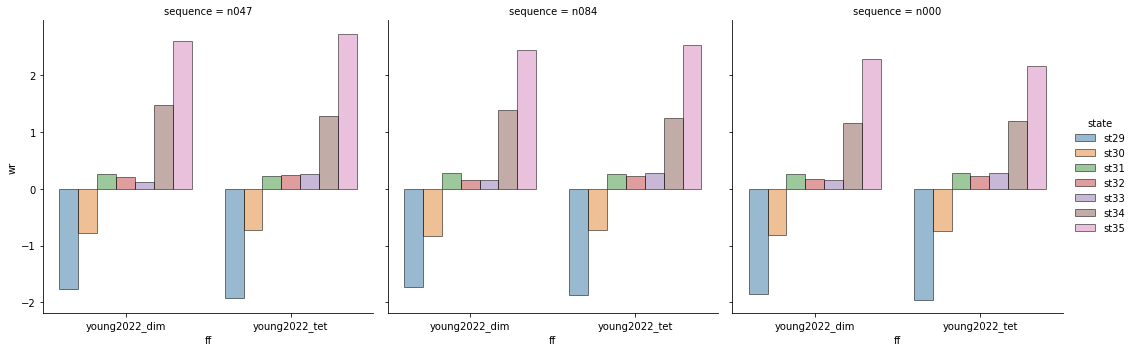

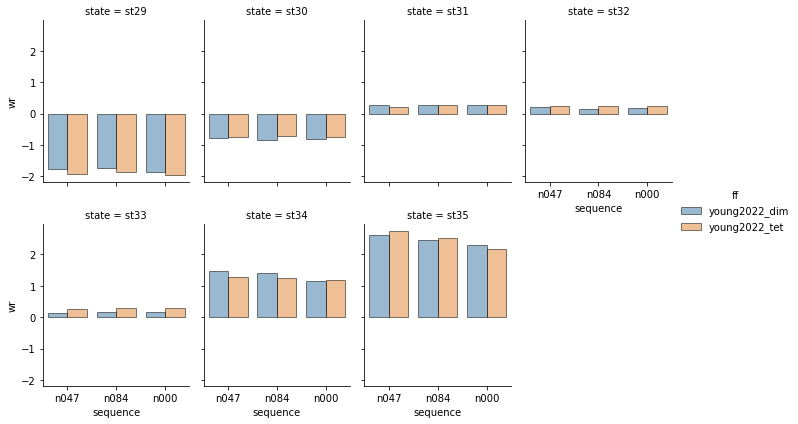

In [27]:
sns.catplot(data=maindf[(maindf.forcefield!="ideal")
                        &(maindf.opt_electro=="y")
                       &(maindf.state.isin(['st'+str(i) for i in range(29,36)]))],
            x="ff", 
            y="wr", 
            hue="state", 
            col="sequence", edgecolor='black',alpha=0.50,
            kind='bar')

sns.catplot(data=maindf[(maindf.forcefield!="ideal")
                        &(maindf.opt_electro=="y")
                       &(maindf.state.isin(['st'+str(i) for i in range(29,36)]))],
            x="sequence", 
            y="wr", 
            kind='bar',
            hue="ff", 
            col="state",
            edgecolor='black',alpha=0.50,col_wrap=4,height=3, aspect=0.8)

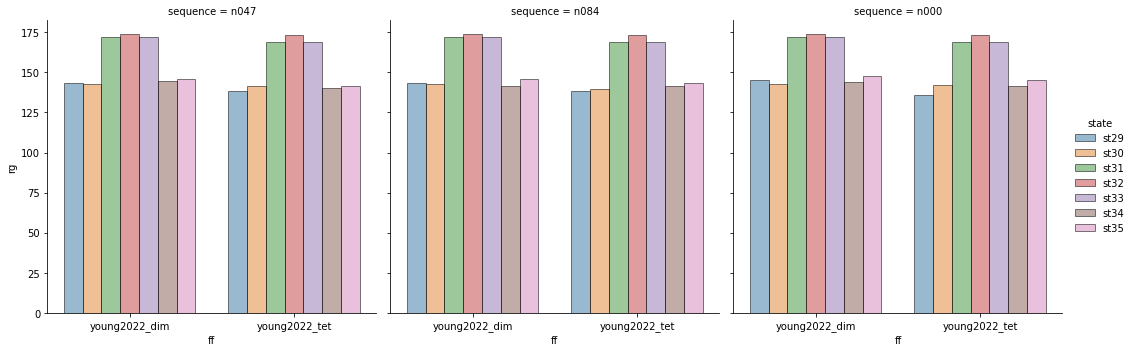

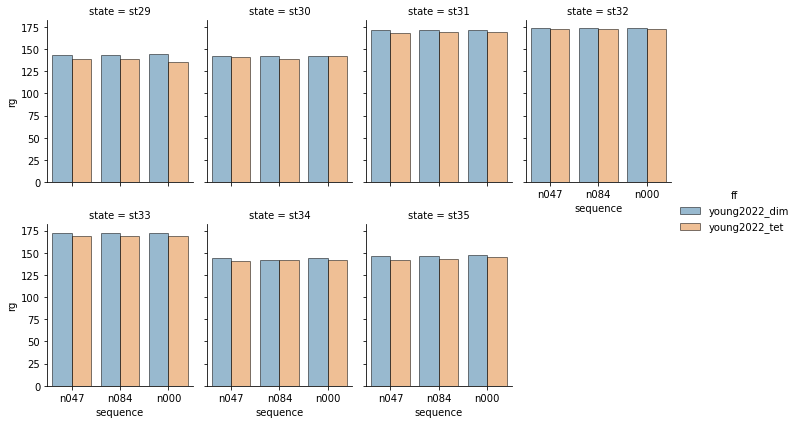

In [28]:
sns.catplot(data=maindf[(maindf.forcefield!="ideal")
                        &(maindf.opt_electro=="y")
                       &(maindf.state.isin(['st'+str(i) for i in range(29,36)]))],
            x="ff", 
            y="rg", 
            hue="state", 
            col="sequence", edgecolor='black',alpha=0.50,
            kind='bar')

sns.catplot(data=maindf[(maindf.forcefield!="ideal")
                        &(maindf.opt_electro=="y")
                       &(maindf.state.isin(['st'+str(i) for i in range(29,36)]))],
            x="sequence", 
            y="rg", 
            kind='bar',
            hue="ff", 
            col="state",
            edgecolor='black',alpha=0.50,col_wrap=4,height=3, aspect=0.8)

### Parametric analysis

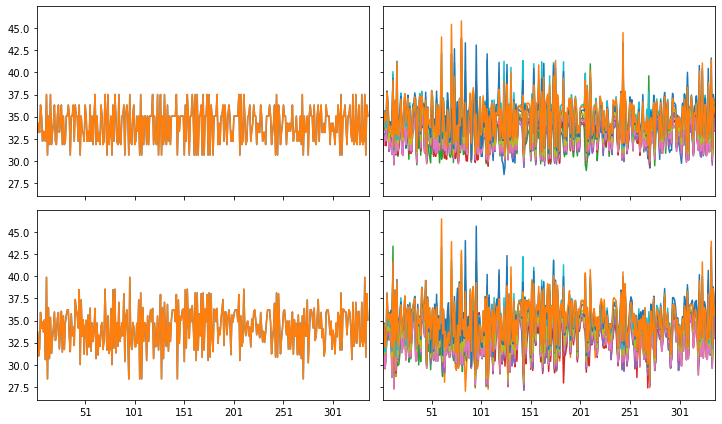

<Figure size 432x288 with 0 Axes>

In [30]:
pardf = pd.read_csv(datapath+"/zech336_par-twist_dataset", index_col=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True, sharex=True)

pltdf = pardf.copy().loc[(pardf.forcefield=='young2022')&(pardf.ff_type=='dim')]
freedf = pltdf[(pltdf.config=='free')]
circdf = pltdf[(pltdf.config=='circ')]
freedf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[0,0])
circdf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[0,1])
del freedf, circdf

pltdf = pardf.copy().loc[(pardf.forcefield=='young2022')&(pardf.ff_type=='tet')]
freedf = pltdf[(pltdf.config=='free')]
circdf = pltdf[(pltdf.config=='circ')]
freedf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[1,0])
circdf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[1,1])
del freedf, circdf


for A in [0,1]:
    for B in [0,1]:
        axes[A,B].set_xlim(1, 336)

plt.tight_layout()
plt.show()
plt.clf()

del pardf,pltdf


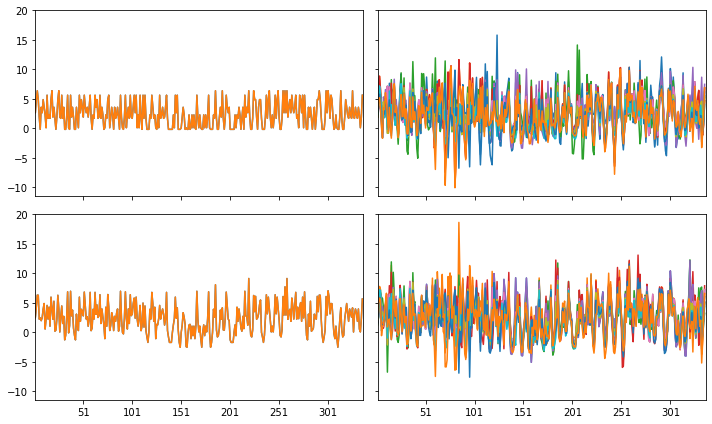

<Figure size 432x288 with 0 Axes>

In [16]:
pardf = pd.read_csv(datapath+"/zech336_par-roll_dataset", index_col=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True, sharex=True)

pltdf = pardf.copy().loc[(pardf.forcefield=='young2022')&(pardf.ff_type=='dim')]
freedf = pltdf[(pltdf.config=='free')]
circdf = pltdf[(pltdf.config=='circ')]
freedf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[0,0])
circdf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[0,1])
del freedf, circdf

pltdf = pardf.copy().loc[(pardf.forcefield=='young2022')&(pardf.ff_type=='tet')]
freedf = pltdf[(pltdf.config=='free')]
circdf = pltdf[(pltdf.config=='circ')]
freedf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[1,0])
circdf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[1,1])
del freedf, circdf


for A in [0,1]:
    for B in [0,1]:
        axes[A,B].set_xlim(1, 336)

plt.tight_layout()
plt.show()
plt.clf()

del pardf,pltdf

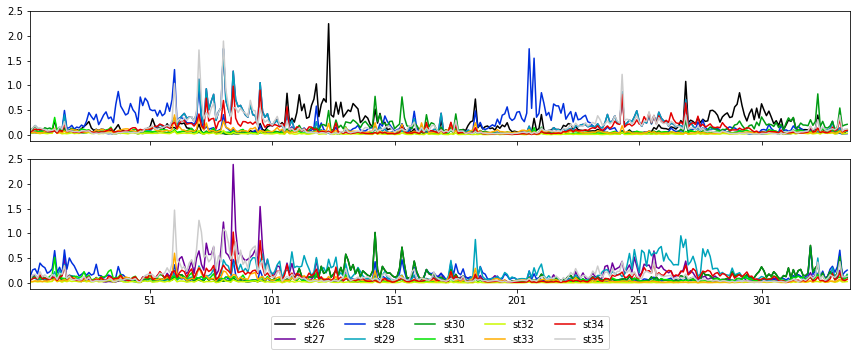

<Figure size 432x288 with 0 Axes>

In [60]:
pardf = pd.read_csv(datapath+"/zech336_circ-energy_dataset", index_col=0)

pltdf = pardf.copy().loc[(pardf.config=='circ')
                         &(pardf.forcefield=='young2022')
                         &(pardf.opt_electro=='y')]

fig, axes = plt.subplots(2, 1, figsize=(12, 5), sharey=True, sharex=True)

circdf = pltdf[(pltdf.ff_type=='dim')].reset_index(drop=True).set_index("state")

LENGTH=len(circdf)
color=plt.cm.nipy_spectral(np.linspace(0,1,LENGTH))

for c, state in enumerate(circdf.index):
    circdf[[str(i) for i in range(1, 336+1)]].loc[state].T.plot(legend=False, 
                                                            color=color[c], 
                                                            ax=axes[0])
#del circdf

circdf = pltdf[(pltdf.ff_type=='tet')].reset_index(drop=True).set_index("state")
for c, state in enumerate(circdf.index):
    circdf[[str(i) for i in range(1, 336+1)]].loc[state].T.plot(legend=True, 
                                                            color=color[c], 
                                                            ax=axes[1])
#del circdf

for ax in axes:
    ax.set_xlim(1, 336)

axes[1].legend(loc="lower center", ncol=int(LENGTH/2), bbox_to_anchor=(0.5, -0.5))
del LENGTH, color

plt.tight_layout()
plt.show()
plt.clf()

del pardf

In [61]:
circdf

,1,2,3,4,5,6,7,8,9,10,...,336,length,scdna,sequence,forcefield,ff_type,config,opt_electro,sum,eopt
state,,,,,,,,,,,,,,,,,,,,,
st26,0.119961,0.060710,0.114137,0.121314,0.095086,0.114050,0.128862,0.095598,0.067832,0.090815,...,0.109448,336.0,-6.0,zech-000,young2022,tet,circ,y,374.652279,42.941475
st27,0.145186,0.084547,0.128112,0.150529,0.110310,0.065682,0.079379,0.053601,0.055722,0.076986,...,0.119094,336.0,-5.0,zech-000,young2022,tet,circ,y,393.056223,66.696879
st28,0.265625,0.133620,0.262400,0.284269,0.185251,0.399403,0.339935,0.306956,0.195896,0.225757,...,0.257878,336.0,-4.0,zech-000,young2022,tet,circ,y,374.398646,42.649459
st29,0.133226,0.067586,0.091827,0.092861,0.057205,0.072505,0.112274,0.077070,0.062777,0.091927,...,0.173699,336.0,-3.0,zech-000,young2022,tet,circ,y,400.112889,75.483523
st30,0.119950,0.060707,0.114126,0.121311,0.095087,0.114030,0.128846,0.095588,0.067823,0.090813,...,0.109441,336.0,-2.0,zech-000,young2022,tet,circ,y,374.652236,42.941513
st31,0.142781,0.084675,0.090651,0.122115,0.086732,0.085116,0.083653,0.098290,0.085530,0.132235,...,0.157588,336.0,-1.0,zech-000,young2022,tet,circ,y,359.342282,26.319729
st32,0.033668,0.014298,0.026102,0.029391,0.021290,0.025233,0.030272,0.025905,0.018246,0.025195,...,0.028169,336.0,0.0,zech-000,young2022,tet,circ,y,341.744550,8.646704
st33,0.049729,0.033928,0.025004,0.041760,0.035587,0.040856,0.023121,0.042858,0.032398,0.067133,...,0.072854,336.0,1.0,zech-000,young2022,tet,circ,y,356.541992,23.408927
st34,0.071326,0.054717,0.086749,0.105776,0.079514,0.163583,0.086627,0.094588,0.078858,0.069923,...,0.075692,336.0,2.0,zech-000,young2022,tet,circ,y,375.287299,43.387953


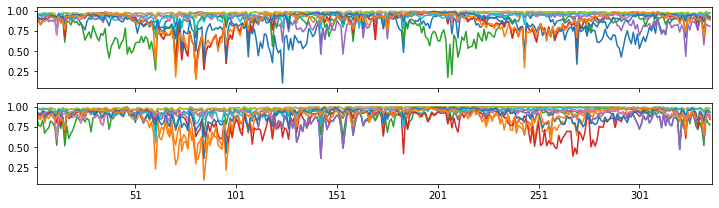

<Figure size 432x288 with 0 Axes>

In [18]:
pardf = pd.read_csv(datapath+"/zech336_circ-energy_dataset", index_col=0)

pltdf = pardf.copy().loc[(pardf.config=='circ')&(pardf.forcefield=='young2022')]

for i in range(1, 337):
    pltdf[str(i)]=np.exp(-1*pltdf[str(i)])

fig, axes = plt.subplots(2, 1, figsize=(10, 3), sharey=True, sharex=True)

circdf = pltdf[(pltdf.ff_type=='dim')]
circdf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[0])
del circdf

circdf = pltdf[(pltdf.ff_type=='tet')]
circdf[[str(i) for i in range(1, 336+1)]].T.plot(legend=False, ax=axes[1])
del circdf

for ax in axes:
    ax.set_xlim(1, 336)

plt.tight_layout()
plt.show()
plt.clf()

del pardf, pltdf